In [549]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, probplot
pd.options.display.max_columns = None # Display all columns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Id
train_id = train[['Id']]
test_id = test[['Id']]

# SalePrice
y_train = train['SalePrice']

train_len = len(train)

display(train.head())
print('Train Data:',train.shape, 'Test Data:', test.shape)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Train Data: (1460, 81) Test Data: (1459, 80)



 mu = 180921.20 and sigma = 79415.29



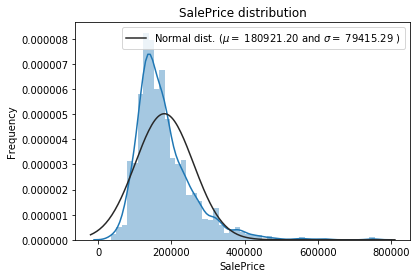

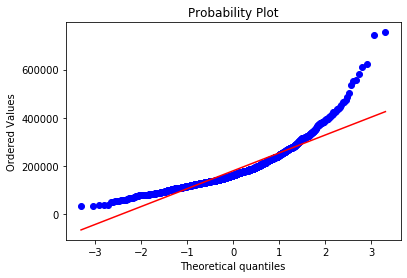

In [550]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



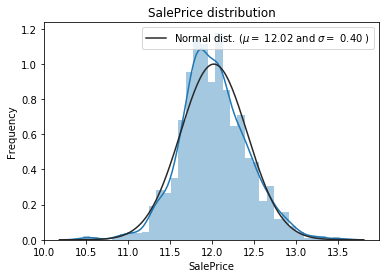

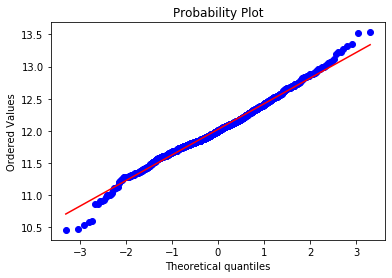

In [551]:
## Correcting SalePrice Skewness
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = probplot(train['SalePrice'], plot=plt)
plt.show()

In [552]:
# Merging train and test data
df = pd.concat([train, test], sort=False)
df.drop('Id', axis=1, inplace=True)
df.drop('SalePrice', axis=1, inplace=True)
df.shape

(2919, 79)

In [553]:
# Filling NaNs
df['PoolQC'] = df['PoolQC'].fillna(value='None')
df['Alley'] = df['Alley'].fillna(value='None')
df['Fence'] = df['Fence'].fillna(value='None')
df['FireplaceQu'] = df['FireplaceQu'].fillna(value='None')
df['MiscFeature'] = df['MiscFeature'].fillna(value='None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(value=0)
df['GarageCond'] = df['GarageCond'].fillna(value='None')
df['GarageFinish'] = df['GarageFinish'].fillna(value='None')
df['GarageQual'] = df['GarageQual'].fillna(value='None')
df['GarageType'] = df['GarageType'].fillna(value='None')
df["MasVnrType"] = df["MasVnrType"].fillna('None')
df['MSSubClass'] = df['MSSubClass'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

#df.drop(['Utilities'], axis=1, inplace=True) # Dropping 'Utilities' feature

df['Functional'] = df['Functional'].fillna('Typ') # Filling most common value
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(value=0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')

# Filling LotFrontage by mean size of the neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df.isna().sum().sort_values(ascending=False)

Utilities        2
SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
MSSubClass       0
Length: 79, dtype: int64

In [554]:
## Encoding categorical features

# Transforming features to categorical
for col in ('MSSubClass', 'OverallCond', 'YrSold', 'MoSold'):
    df[col] = df[col].astype(str)
    
# Encoding features
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# Shape        
print('Shape all_data: {}'.format(df.shape))

# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

Shape all_data: (2919, 79)


In [555]:
from scipy.special import boxcox1p

# Check the skew of all numerical features
num_features_names = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[num_features_names].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
display(skewness.head(10))

# Removing Skewness
skewness = skewness[abs(skewness) > 0.75]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694


There are 59 skewed numerical features to Box Cox transform


In [556]:
# Getting Dummies
df = pd.get_dummies(df)
print(df.shape)

(2919, 223)


In [557]:
# Getting Model Data
X_train = df[:train_len]
X_test = df[train_len:]
X_train.shape, X_test.shape

((1460, 223), (1459, 223))

In [558]:
display(X_train.head(), X_train.shape, y_train.shape)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,8.059126,1.194318,1.820334,1.194318,1.820334,1.540963,1.194318,11.170327,2.259674,0.0,7.483296,11.692623,0.000000,0.730463,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,1.194318,2.602594,2.259674,0.000000,1.540963,14.187527,1.194318,1.194318,10.506271,2.055642,2.055642,1.194318,0.000000,5.714669,0.000000,0.0,0.0,0.0,1.540963,1.820334,0.0,1.82

(1460, 223)

(1460,)

In [615]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor #~0.897
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor #~0.882
from lightgbm import LGBMRegressor #0.872
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor

from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [560]:
X_train.shape, y_train.shape

((1460, 223), (1460,))

In [673]:
%%time
## Defining Estimators
et = ExtraTreesRegressor()
br = BayesianRidge()
LLIC = LassoLarsIC()
ab = AdaBoostRegressor()
rf = RandomForestRegressor(n_estimators=100)
lr = LinearRegression()
lasso = Lasso()
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(learning_rate= 0.1, loss='ls', max_depth= 3, n_estimators= 200)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

estimators = (('rf', rf), ('lr', lr), ('lasso', lasso), ('ENet', ENet), ('KRR', KRR), ('GBoost', GBoost),
              ('xgb', xgb), ('lgb', lgb), ('ab', ab), ('LLIC', LLIC), ('br', br), ('et', et))

Wall time: 1.96 ms


In [654]:
params = {}
scores_list = []

# Looping thru estimators and saving mean scores
for name, estimator in estimators:
    CV = GridSearchCV(estimator, params, cv=3, scoring='r2')
    CV.fit(X_train, y_train)
    scores_list.append((name, CV.cv_results_['mean_test_score'][0]))

scores = pd.DataFrame(scores_list, columns=['estimator', 'mean_test_score']).sort_values(by='mean_test_score', ascending=False)
display(scores)

C:\Users\Mat\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258527114963.68875, tolerance: 623680236.5760013
  positive)
C:\Users\Mat\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179416853.531433, tolerance: 590585261.3683215
  positive)
C:\Users\Mat\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227923732731.46646, tolerance: 627039531.5481367
  positive)
C:\Users\Mat\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31

C:\Users\Mat\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 210 iterations, i.e. alpha=3.236e-01, with an active set of 186 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Mat\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 212 iterations, i.e. alpha=2.633e-01, with an active set of 186 regressors, and the smallest cholesky pivot element being 7.598e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Mat\Miniconda3\lib\site-packages\sklearn\linear_model\least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 212 iterations, i.e. alpha=2.485e-01, with an active set of 186 regressors, and the smallest chole

,estimator,mean_test_score
6,xgb,0.898512
5,GBoost,0.893405
7,lgb,0.889842
0,rf,0.863615
11,et,0.853742
4,KRR,0.844370
10,br,0.842875
9,LLIC,0.828327
3,ENet,0.824343
2,lasso,0.824010


Wall time: 1min 7s


In [666]:
params_gboost = {'loss': ('ls', 'lad', 'huber', 'quantile'),
                 'learning_rate': [0.05,0.1,0.2,0.3,0.4],
                 'n_estimators': [50, 100, 150, 200],
                 'max_depth': [2,3,4,5]}
CV_gboost = GridSearchCV(GBoost, params_gboost, cv=3, scoring='r2')
CV_gboost.fit(X_train, y_train)
CV_gboost.cv_results_

{'mean_fit_time': array([0.14390373, 0.2803816 , 0.39313944, 0.49592733, 0.27542496,
        0.52372646, 1.2289865 , 1.53920531, 0.43801157, 0.8322355 ,
        1.99189289, 1.92176437, 0.62506882, 2.02465383, 2.20592276,
        2.66384379, 0.45163933, 0.78574045, 1.30262335, 1.70839246,
        0.78306619, 1.35929449, 1.18639747, 1.06882906, 0.58269596,
        1.9492143 , 2.13826386, 1.76676408, 1.49560936, 1.93585277,
        2.6542569 , 3.29983775, 0.44033456, 0.79223323, 1.12147935,
        1.12830806, 0.37253102, 0.65152176, 0.97133112, 2.40485048,
        0.85251236, 1.0079639 , 2.0529391 , 2.94724425, 0.83148217,
        3.10027409, 2.45925736, 4.14078045, 0.17187595, 0.34038893,
        0.49050172, 1.14415654, 0.58538222, 1.2504278 , 1.56091698,
        1.04325136, 0.36877147, 1.17625141, 2.6717368 , 4.25182915,
        1.07679264, 2.35031684, 2.80283753, 2.89874554, 0.32567859,
        0.60535979, 1.02708125, 1.13453857, 0.5804855 , 1.23518467,
        1.44676185, 1.84822512,

In [672]:
display(CV_gboost.best_score_,
CV_gboost.best_params_)

0.899961404830605

{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'n_estimators': 200}

In [674]:
%%time
# Voting with estimators
best_estimators = (('GBoost', GBoost), ('xgb', xgb), ('lgb', lgb))
voting_estimator = VotingRegressor(best_estimators)
CV_voting = GridSearchCV(voting_estimator, params, cv=3, scoring='r2')
CV_voting.fit(X_train, y_train)
CV_voting.cv_results_

C:\Users\Mat\Miniconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Mat\Miniconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Mat\Miniconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Mat\Miniconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Mat\Miniconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Wall time: 49 s


{'mean_fit_time': array([10.04326828]),
 'std_fit_time': array([2.00945254]),
 'mean_score_time': array([0.10727835]),
 'std_score_time': array([0.00292183]),
 'params': [{}],
 'split0_test_score': array([0.92652819]),
 'split1_test_score': array([0.88470044]),
 'split2_test_score': array([0.89952805]),
 'mean_test_score': array([0.90358834]),
 'std_test_score': array([0.01732106]),
 'rank_test_score': array([1])}

In [675]:
first_3_est_results = CV_voting.cv_results_
first_3_est_results

{'mean_fit_time': array([10.04326828]),
 'std_fit_time': array([2.00945254]),
 'mean_score_time': array([0.10727835]),
 'std_score_time': array([0.00292183]),
 'params': [{}],
 'split0_test_score': array([0.92652819]),
 'split1_test_score': array([0.88470044]),
 'split2_test_score': array([0.89952805]),
 'mean_test_score': array([0.90358834]),
 'std_test_score': array([0.01732106]),
 'rank_test_score': array([1])}

In [676]:
predicted_y = pd.DataFrame(clf.predict(X_test),columns=['SalePrice'])
submission = test_id.join(predicted_y)
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,SalePrice
0,1461,126716.764300
1,1462,167528.710747
2,1463,186786.400917
3,1464,192604.164047
4,1465,199902.827571


In [564]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)